## Objetivos formativos
- Diseñar un experimento de clasificación mediante árbol de decisión
- Analizar los resultados obtenidos en un problema de clasificación
- Realizar una búsqueda de los mejores parámetros 


## Iris dataset

Descargamos el dataset y dibujamos empleando dos características:

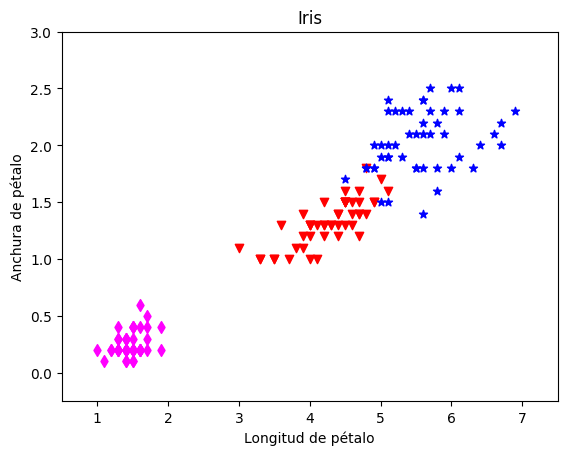

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
 
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
Y = iris.target

fig = plt.figure()
ax = fig.add_subplot()
ax.axis([0.5, 7.5, -0.25, 3])
ax.scatter(X[0:49,0], X[0:49,1], color="magenta", marker="d") 
ax.scatter(X[50:99,0], X[50:99,1], color="r", marker="v") 
ax.scatter(X[100:149,0], X[100:149,1], color="b", marker="*") 
ax.set_title("Iris")

ax.set_xlabel("Longitud de pétalo")
ax.set_ylabel("Anchura de pétalo")
plt.show()

## Empleamos un árbol de decisión

Vemos las fronteras de decisión del clasificador obtenido

Text(0.5, 1.0, 'KNN (K=1)')

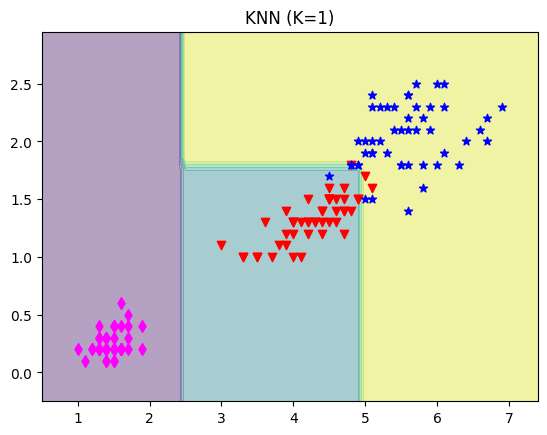

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier


DT = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=23)
DT.fit(X, Y)


y1_min, y1_max = 0.5, 7.5
y2_min, y2_max = -0.25, 3

xx, yy = np.meshgrid(np.arange(y1_min, y1_max, 0.1),np.arange(y2_min, y2_max, 0.1))

f, axarr = plt.subplots()
Z = DT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[0:49,0], X[0:49,1], color="magenta",marker="d")
axarr.scatter(X[50:99,0], X[50:99,1], color="r",marker="v")
axarr.scatter(X[100:149,0], X[100:149,1], color="b",marker="*")
axarr.set_title("DT")

## Dividir el conjunto de datos entre training y test y clasificar

Vamos a dividir el conjunto de datos en entrenamiento y test. A continuación emplearemos el entrenamiento para definir un clasificador y el de test para evaluarlo sobre dicho clasificador.

Además vamos a emplear ya las 4 variables que hay en Iris.



In [3]:
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data
Y = iris.target

## Partición train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=12)


## Entrenamiento
DT = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=23)
DT.fit(X_train, y_train)

## Evaluación sobre el test
acc=DT.score(X_test,y_test)


print(f'Precisión: {acc:.1%}')



Precisión: 93.3%


### Ejercicio

Cuando tenemos tan pocos datos como es el caso de Iris lo ideal es realizar una validación cruzada para obtener una mejor estimación del error de clasificación. 

Busca en la documentación de DecisionTreeClassifier cuáles son los principales argumentos y mediante GridSearch con validación cruzada realiza una exploración de los mismos.

### Ejercicio

Implementa un pipeline con PCA y busca los mejores parámetros (PCA y DT) mediante GridSearch y validación cruzada

## Clasificación del dataset Digits

Emplearemos ahora el dataset DIGITS, imágenes de 8x8 píxeles de los 10 dígitos $[0,9]$. En total hay 1797 imágenes de 8x8 píxeles. 

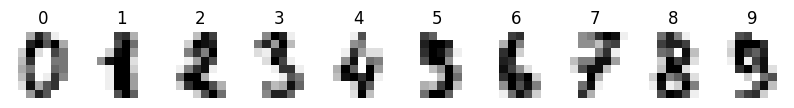

In [4]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % label)

### Ejercicio

Realizar una validación cruzada para encontrar los mejores parámetros, también implementa un pipeline.